In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.7'

In [3]:
# read in data (sample)
df = pd.read_csv('citibike_sample_1pct.csv', header=0, low_memory=False)

In [4]:
# Due to error warning in the process concerning lines in the column that are no proper dates
# drop lines that are no proper date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# filter 2022 only
df = df[df['date'].dt.year == 2022]

# set date as index
df = df.set_index('date')

# set date to day (ignore time component of the date: important for aggregation and count of rides, 
# otherwise only one trip per specificg date/time)
df['day'] = df.index.floor('D')

# Aggregate days, count rides: Create a column with the count of trips per day
df_group = df.groupby('day')['ride_id'].count().reset_index()
df_group.rename(columns={'ride_id':'bike_rides_daily'}, inplace=True)

In [5]:
# sort dates/index
df = df.sort_index()

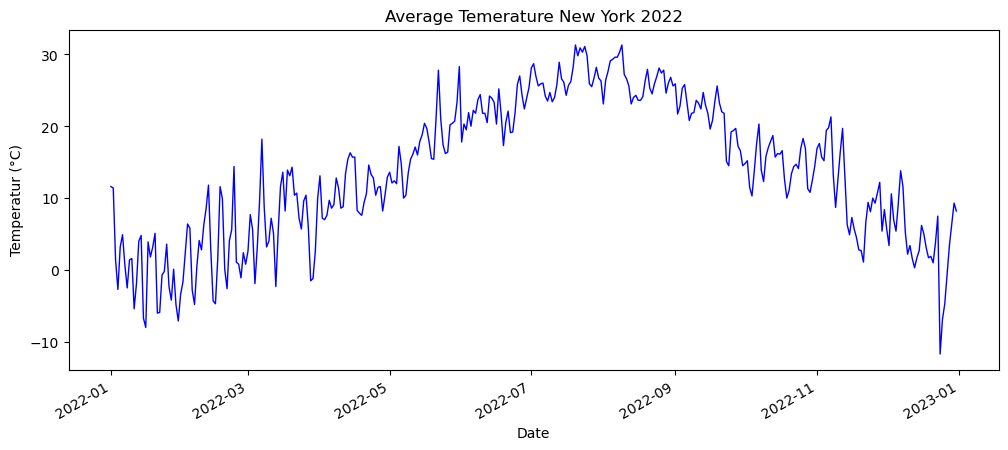

In [6]:
# plot chart
df['avgTemp'].plot(figsize=(12,5), color='blue', linewidth= 1)
plt.xlabel('Date')
plt.ylabel('Temperatur (°C)')
plt.title('Average Temerature New York 2022')

plt.show()

In [7]:
# merge df_group with the main dataset...

In [8]:
#preparation for merge
df_group.head()

,day,bike_rides_daily
0,2022-01-01,224
1,2022-01-02,447
2,2022-01-03,362
3,2022-01-04,398
4,2022-01-05,338


In [9]:
df_group.columns


Index(['day', 'bike_rides_daily'], dtype='object')

In [10]:
# merge
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "day", how = 'outer', indicator = 'merge_test')
print(df['merge_test'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['day'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['day'] == '2022-01-02'].shape) # Second check 



merge_test
both          303634
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (224, 18)
Shape of January 2nd is (447, 18)


In [11]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'year_month', 'day', 'bike_rides_daily',
       'merge_test'],
      dtype='object')

In [12]:
df_temp = df.set_index('day')

print(df_temp.columns)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'year_month', 'bike_rides_daily',
       'merge_test'],
      dtype='object')


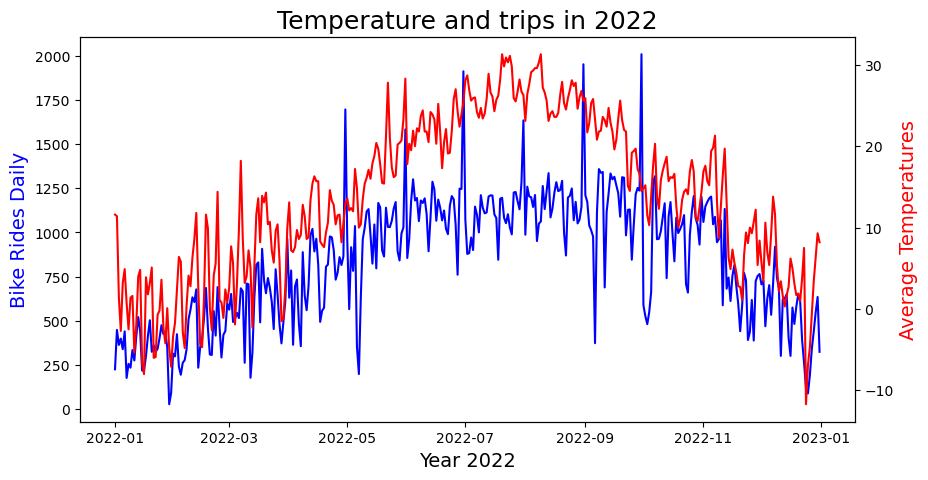

In [13]:
# crate a dual axis in this case twin axis

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "blue")
ax.set_xlabel ("Year 2022", fontsize =14)
ax.set_ylabel("Bike Rides Daily", color = "blue",fontsize=14)

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14) # set lables
plt.title('Temperature and trips in 2022', fontsize = 18) # set title
plt.show()

COMMENT: In this case its object orientated programming. That means, it consist of different objects. The figure is an object and something like a outer frame or container (eventually like a piece of paper) that includes other objects like the axes, wich include themselves other elements. (eventually like a square on the paper with drawings or other information within)

BONUS TASK - 

I decided to change the task a little, as the variables requested only exist in the Chicago dataset used in the exercise. 
Therefore, I rewrote the task slightly and chose something that fits my city bike New York data set.

In [14]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,year_month,bike_rides_daily,merge_test
day,,,,,,,,,,,,,,,,,
2022-01-01,E119215C06036EFC,electric_bike,2022-01-01 07:37:20.940,2022-01-01 07:43:59.077,Madison Ave & E 99 St,7443.01,E 77 St & 3 Ave,7092.06,40.78948541553215,-73.95242929458618,40.77314236,-73.95856158,member,11.6,2022-01,224,both
2022-01-01,1EF6CB2034F8FCE3,electric_bike,2022-01-01 16:43:19.018,2022-01-01 18:11:01.656,W 100 St & Broadway,7580.01,E Tremont Ave & Jerome Ave,8403.02,40.7973721,-73.97041192,40.851747,-73.908964,member,11.6,2022-01,224,both
2022-01-01,0AA3FF0FF8EF4907,classic_bike,2022-01-01 02:25:45.733,2022-01-01 02:39:13.801,Bedford Ave & Bergen St,4066.15,Broadway & Madison St,4483.10,40.676368,-73.952918,40.68822,-73.91966,casual,11.6,2022-01,224,both
2022-01-01,D05A593BFE9697D3,classic_bike,2022-01-01 00:47:43.550,2022-01-01 00:54:55.615,Grand Army Plaza & Central Park S,6839.10,E 58 St & 3 Ave,6762.02,40.7643971,-73.97371465,40.76095756,-73.96724467,casual,11.6,2022-01,224,both
2022-01-01,B77667F236053C94,classic_bike,2022-01-01 00:13:02.530,2022-01-01 00:20:19.315,Westchester Ave & Southern Blvd,8004.03,Southern Blvd & E 175 St,8196.02,40.824956,-73.891677,40.839335,-73.886445,casual,11.6,2022-01,224,both


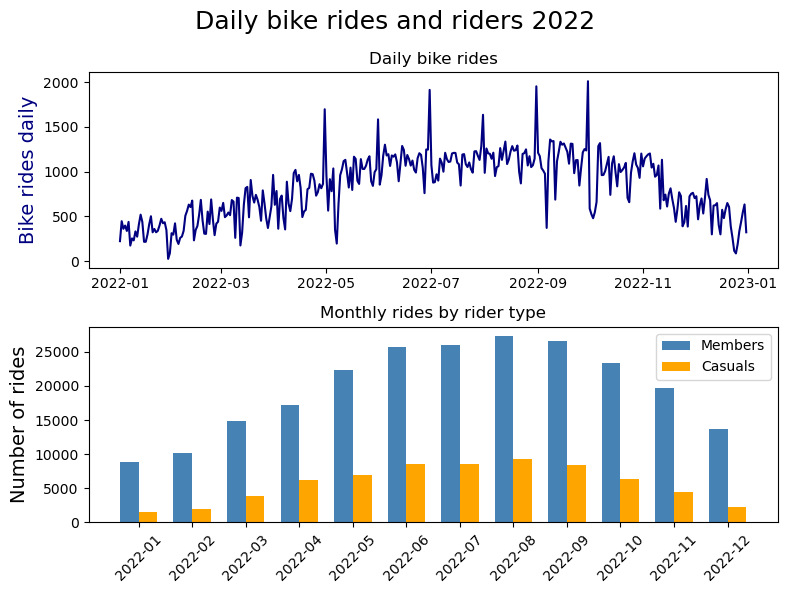

In [15]:
# Object Orientated Approch with two Axes

# Figure und Subplots
fig, ax = plt.subplots(2, figsize=(8, 6))

# line ´chart daily bike rides
ax[0].plot(df_temp['bike_rides_daily'], color="navy")
ax[0].set_ylabel("Bike rides daily", color="navy", fontsize=14)
ax[0].set_title("Daily bike rides")

# gropuped barchart Members vs Casuals per month

# Aggregation: Count of rides per month and rider-type
monthly_counts = (
    df_temp
    .groupby(['year_month', 'member_casual'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

months = monthly_counts.index
members = monthly_counts['member']
casuals = monthly_counts['casual']

x = np.arange(len(months))
width = 0.35

ax[1].bar(x - width/2, members, width, label='Members', color='steelblue')
ax[1].bar(x + width/2, casuals, width, label='Casuals', color='orange')

ax[1].set_xticks(x)
ax[1].set_xticklabels(months, rotation=45)
ax[1].set_ylabel("Number of rides", fontsize=14)
ax[1].set_title("Monthly rides by rider type")
ax[1].legend()

# Gesamttitel
plt.suptitle('Daily bike rides and riders 2022', fontsize=18)

plt.tight_layout()
plt.show()